In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, Dropout,BatchNormalization,GlobalAveragePooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test,Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
def plot_acc_loss(result):
  # function to plot the accuracy and loss graphs
  acc = result.history['accuracy']
  val_acc = result.history['val_accuracy']
  loss = result.history['loss']
  val_loss = result.history['val_loss']

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title("Training and Validation Accuracy")
  plt.plot(acc,color = 'green',label = 'Training Acuracy')
  plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(loss,color = 'blue',label = 'Training Loss')
  plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size = 0.2)

In [ ]:
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)
y_test = to_categorical(Y_test, num_classes = 10)

In [ ]:
x_train = x_train * 1.0/255

x_val = x_val * 1.0/255

X_test = X_test * 1.0/255

In [ ]:
print(x_train.shape, x_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 10) (10000, 10) (10000, 10)


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=1e-6)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model=tf.keras.models.Sequential()
model.add(UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.25))
model.add(Dense(256, activation='elu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [ ]:
model.compile(
    optimizer = optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
result=model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 64),
    validation_data = (x_val, y_val),
    epochs = 20,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

Epoch 1/20
625/625 [==============================] - 350s 535ms/step - loss: 1.1522 - accuracy: 0.6058 - val_loss: 5.2217 - val_accuracy: 0.1146 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 330s 527ms/step - loss: 0.7696 - accuracy: 0.7377 - val_loss: 0.5574 - val_accuracy: 0.8083 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 329s 527ms/step - loss: 0.6684 - accuracy: 0.7684 - val_loss: 0.5184 - val_accuracy: 0.8247 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 329s 527ms/step - loss: 0.6157 - accuracy: 0.7876 - val_loss: 0.4596 - val_accuracy: 0.8443 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 329s 527ms/step - loss: 0.5577 - accuracy: 0.8065 - val_loss: 0.4464 - val_accuracy: 0.8496 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - 329s 527ms/step - loss: 0.5396 - accuracy: 0.8137 - val_loss: 0.4109 - val_accuracy: 0.8591 - lr: 0.0010
Epoch 7/20
625/625 [==========================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, None, None, None   0         
 D)                          )                                   
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization (Batch  (None, 256)               1

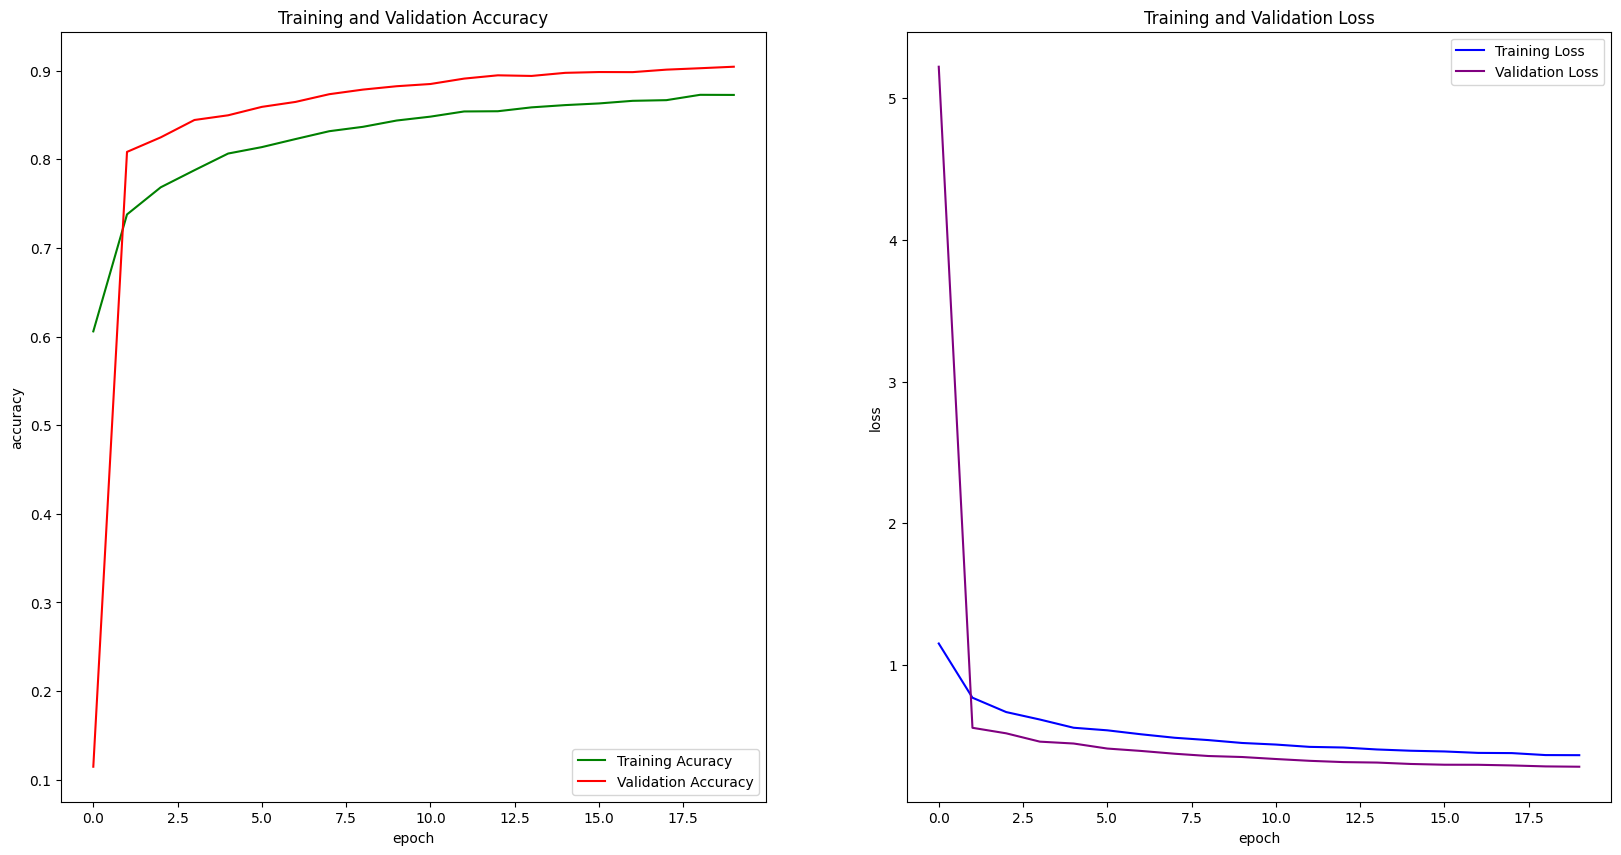

In [ ]:
plot_acc_loss(result)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = Y_test.ravel()
print(y_pred.shape,y_true.shape)


313/313 [==============================] - 29s 89ms/step
(10000,) (10000,)


In [ ]:
print("Testing Accuracy: ", accuracy_score(y_true,y_pred))

NameError: name 'accuracy_score' is not defined